In [106]:
import pandas as pd

# Mengimpor dataset
data = pd.read_csv(r"C:\Users\ASUS\Documents\Machine Learning\1B.csv")


# EDA

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          999 non-null    object 
 1   Birth Date                      999 non-null    object 
 2   Height                          999 non-null    float64
 3   Weight                          999 non-null    object 
 4   family_history_with_overweight  999 non-null    object 
 5   High Calorie Meal Freq          999 non-null    object 
 6   Veggies in Meals freq           999 non-null    float64
 7   Daily Main Meals                999 non-null    float64
 8   Snack Frequency                 989 non-null    object 
 9   Smoking                         999 non-null    object 
 10  Daily Water Consumption         999 non-null    float64
 11  Weekly Physical Activity        999 non-null    float64
 12  Alcohol                         999 

In [111]:
data.head()

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level
0,Female,2003/02/05,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,0.0,no,Public_Transportation,Normal_Weight
1,Female,2003/06/13,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,3.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,2001/06/25,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,2.0,Frequently,Public_Transportation,Normal_Weight
3,Male,1997/08/14,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,2.0,Frequently,Walking,Overweight_Level_I
4,Male,2002/05/14,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [113]:
data.tail()

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level
994,Male,2001/08/07,1.792527,89.994415,yes,yes,1.771693,1.890213,Sometimes,no,2.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
995,Male,2001/04/11,1.795311,89.868784,yes,yes,1.572230,1.888067,Sometimes,no,2.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
996,Female,2001/02/13,1.700038,delapan puluh,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,0.973114,no,Public_Transportation,Overweight_Level_II
997,Female,2001/11/03,1.668649,80.458343,yes,yes,2.000000,2.256119,Sometimes,no,1.142873,0.807076,no,Public_Transportation,Overweight_Level_II
998,Male,1999/09/17,1.700000,84.687554,yes,yes,2.000000,3.000000,Sometimes,no,2.020424,0.000000,Sometimes,Public_Transportation,Overweight_Level_II


In [115]:
# Menampilkan jumlah missing values per kolom
print(data.isnull().sum())

Gender                             0
Birth Date                         0
Height                             0
Weight                             0
family_history_with_overweight     0
High Calorie Meal Freq             0
Veggies in Meals freq              0
Daily Main Meals                   0
Snack Frequency                   10
Smoking                            0
Daily Water Consumption            0
Weekly Physical Activity           0
Alcohol                            0
Transportation                     0
Obesity level                      0
dtype: int64


#### Missing value dan konversi value untuk "Snack Frequency"

In [118]:
# Mapping nilai 'no', 'Sometimes', 'Frequently', 'Always' ke angka
snack_map = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
data['Snack Frequency'] = data['Snack Frequency'].map(snack_map)

snack_mode = data['Snack Frequency'].mode()[0] # Ambil modus pertama

# Mengisi missing value dengan modus
data['Snack Frequency'] = data['Snack Frequency'].fillna(snack_mode)
data['Snack Frequency'] = data['Snack Frequency'].astype(int) #diubah mmenjadi int

In [120]:
unique_values = data['Snack Frequency'].unique()

#cek apakah masi ada value lain yang aneh
print(unique_values)


[1 2 3 0]


#### Mengubah format kelahiran menjadi umur dan mengganti nama kolom menjadi "Age"

In [123]:
from datetime import datetime

# Fungsi untuk menghitung umur
def calculate_age(birth_date_str):
    birth_date = datetime.strptime(birth_date_str, "%Y/%m/%d")
    reference_date = datetime(2025, 1, 16)  # Tanggal referensi tetap
    age = reference_date.year - birth_date.year
    if (reference_date.month, reference_date.day) < (birth_date.month, birth_date.day):
        age -= 1
    return age

# Mengganti kolom 'Birth Date' dengan umur
data['Birth Date'] = data['Birth Date'].apply(calculate_age)

# Mengganti nama kolom 'Birth Date' menjadi 'Age'
data.rename(columns={'Birth Date': 'Age'}, inplace=True)

# Menampilkan hasil
print(data[['Age']])

     Age
0     21
1     21
2     23
3     27
4     22
..   ...
994   23
995   23
996   23
997   23
998   25

[999 rows x 1 columns]


#### Konversi "delapan puluh" menjadi "80" pada kolom "Weight"

In [126]:
data['Weight'] = data['Weight'].replace('delapan puluh', '80')  # Mengubah string menjadi angka
data['Weight'] = data['Weight'].astype(float).round(1)  # Membatasi 1 angka di belakang koma
data['Weight'] = data['Weight'].apply(lambda x: f"{x:.1f}")  # Selalu menampilkan 1 angka di belakang koma

In [128]:
unique_values = data['Weight'].unique()

#cek apakah masi ada value lain yang aneh
print(unique_values)

['64.0' '56.0' '77.0' '87.0' '89.8' '53.0' '55.0' '68.0' '105.0' '80.0'
 '99.0' '60.0' '66.0' '102.0' '78.0' '82.0' '70.0' '50.0' '65.0' '52.0'
 '76.0' '83.0' '90.0' '62.0' '49.0' '48.0' '67.0' '88.0' '75.0' '72.0'
 '54.5' '44.0' '58.0' '57.0' '69.0' '95.0' '112.0' '85.0' '45.0' '91.0'
 '85.5' '58.5' '93.0' '84.0' '42.0' '63.0' '66.4' '51.0' '86.0' '61.0'
 '109.0' '93.5' '59.0' '94.0' '130.0' '79.0' '59.8' '96.0' '98.0' '74.0'
 '118.0' '40.0' '71.0' '100.0' '73.0' '114.0' '42.3' '66.5' '121.0'
 '120.0' '47.0' '81.0' '115.0' '107.0' '110.0' '55.3' '64.4' '173.0'
 '97.0' '125.0' '92.0' '108.0' '69.5' '39.0' '113.0' '89.0' '53.8' '100.5'
 '51.5' '53.5' '104.0' '104.6' '126.7' '110.8' '137.8' '165.1' '133.0'
 '111.5' '104.8' '134.0' '54.9' '55.7' '55.9' '51.2' '49.9' '44.8' '42.8'
 '43.9' '43.1' '44.6' '42.1' '41.3' '50.9' '50.8' '64.1' '63.6' '58.9'
 '51.6' '41.5' '41.9' '41.4' '49.7' '50.3' '53.7' '51.4' '49.8' '49.5'
 '46.7' '52.6' '52.3' '57.8' '57.1' '43.4' '44.4' '47.1' '59.7' '54.2'

#### Cek nilai unik dan frekuensi untuk kolom kategorikal

In [131]:
categorical_columns = ['Gender', 'family_history_with_overweight', 'High Calorie Meal Freq', 
                       'Smoking', 'Alcohol', 'Transportation', 'Obesity level']

for column in categorical_columns:
    print(f"Unique values for {column}:")
    print(data[column].value_counts())
    print("\n")

Unique values for Gender:
Gender
Female    518
Male      481
Name: count, dtype: int64


Unique values for family_history_with_overweight:
family_history_with_overweight
yes    615
no     384
Name: count, dtype: int64


Unique values for High Calorie Meal Freq:
High Calorie Meal Freq
yes    803
no     196
Name: count, dtype: int64


Unique values for Smoking:
Smoking
no      965
yes      32
hehe      2
Name: count, dtype: int64


Unique values for Alcohol:
Alcohol
Sometimes     617
no            327
Frequently     54
Always          1
Name: count, dtype: int64


Unique values for Transportation:
Transportation
Public_Transportation    725
Automobile               200
Walking                   56
Motorbike                 11
Bike                       7
Name: count, dtype: int64


Unique values for Obesity level:
Obesity level
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Overweight_Level_II     80
Obesity_Type_I          47
Obesity_Type_III        12


#### Mengubah value "hehe"  menjadi modus(no) dalam kolom "Smoking" dan konversi ke numeric

In [212]:
# Mengubah value hehe jadi no
data['Smoking'] = data['Smoking'].replace('hehe', 'no')

# Mengubah 'yes' menjadi 1 dan 'no' menjadi 0, dan memastikan tipe datanya numerik
data['Smoking'] = data['Smoking'].replace({'yes': 1, 'no': 0}).astype(int)

In [136]:
unique_values = data['Smoking'].unique()

#cek apakah masi ada value lain yang aneh
print(unique_values)

[0 1]


#### Konversi value kategorical menjadi numerical dalam kolom "Gender"

In [139]:
gender_map = {"Female": 0, "Male": 1}
data['Gender'] = data['Gender'].map(gender_map)

In [141]:
unique_values = data['Gender'].unique()

#cek apakah masi ada value lain yang aneh
print(unique_values)

[0 1]


#### Konversi ke numerical pada kolom "family_history_with_overweight" dan "High Calorie Meal Freq"

In [210]:
# Ganti 'yes' dengan 1 dan 'no' dengan 0, lalu konversi tipe datanya
data['family_history_with_overweight'] = data['family_history_with_overweight'].replace({'yes': 1, 'no': 0}).astype(int)
data['High Calorie Meal Freq'] = data['High Calorie Meal Freq'].replace({'yes': 1, 'no': 0}).astype(int)

In [146]:
unique_values = data[['family_history_with_overweight', 'High Calorie Meal Freq']].apply(lambda x: x.unique())
#cek apakah masi ada value lain yang aneh
print(unique_values)

   family_history_with_overweight  High Calorie Meal Freq
0                               1                       0
1                               0                       1


#### Membulatkan maksimal 2 angka dibelakang koma pada tabel "Height"

In [149]:
data['Height'] = data['Height'].astype(float).round(2)
data['Height'] = data['Height'].apply(lambda x: "{:.2f}".format(x))

In [150]:
unique_values = data['Height'].unique()

#cek apakah masi ada value lain yang aneh
print(unique_values)

['1.62' '1.52' '1.80' '1.78' '1.50' '1.64' '1.72' '1.85' '1.65' '1.77'
 '1.70' '1.93' '1.53' '1.71' '1.69' '1.60' '1.75' '1.68' '1.58' '1.79'
 '1.56' '1.67' '1.66' '1.81' '1.82' '1.55' '1.61' '1.63' '1.76' '1.57'
 '1.88' '1.87' '1.89' '1.74' '1.83' '1.92' '1.73' '1.84' '1.91' '1.48'
 '1.59' '1.54' '1.90' '1.86' '1.45' '1.98' '1.51' '1.46' '1.49']


#### Pembulatan nilai untuk konsistensi data

In [152]:
columns_to_round = ["Veggies in Meals freq", "Daily Main Meals", "Daily Water Consumption", "Weekly Physical Activity"]
for col in columns_to_round:
    data[col] = data[col].round(0).astype(int)

In [153]:
unique_values = data[['Veggies in Meals freq', 'Daily Main Meals', 'Daily Water Consumption', 'Weekly Physical Activity']].apply(lambda x: x.unique())

#cek apakah masi ada value lain yang aneh
print(unique_values)

Veggies in Meals freq          [2, 3, 1]
Daily Main Meals            [3, 1, 4, 2]
Daily Water Consumption        [2, 3, 1]
Weekly Physical Activity    [0, 3, 2, 1]
dtype: object


#### Konversi ke numerik pada kolom "Alkohol"

In [155]:
alcohol_map = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
data['Alcohol'] = data['Alcohol'].map(alcohol_map)

In [156]:
unique_values = data['Alcohol'].unique()

#cek apakah masi ada value lain yang aneh
print(unique_values)

[0 1 2 3]


#### Cek hasil keseluruhan

In [158]:
print(data.head())

   Gender  Age Height Weight  family_history_with_overweight  \
0       0   21   1.62   64.0                               1   
1       0   21   1.52   56.0                               1   
2       1   23   1.80   77.0                               1   
3       1   27   1.80   87.0                               0   
4       1   22   1.78   89.8                               0   

   High Calorie Meal Freq  Veggies in Meals freq  Daily Main Meals  \
0                       0                      2                 3   
1                       0                      3                 3   
2                       0                      2                 3   
3                       0                      3                 3   
4                       0                      2                 1   

   Snack Frequency  Smoking  Daily Water Consumption  \
0                1        0                        2   
1                1        1                        3   
2                1        

In [167]:
# Menampilkan nilai unik untuk setiap kolom dalam DataFrame
for column in data.columns:
    print(f"Unique values for {column}:")
    print(data[column].unique())
    print("\n")


Unique values for Gender:
[0 1]


Unique values for Age:
[21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 28 32 35 40 45 33 51 56 16 37 14 42 43]


Unique values for Height:
['1.62' '1.52' '1.80' '1.78' '1.50' '1.64' '1.72' '1.85' '1.65' '1.77'
 '1.70' '1.93' '1.53' '1.71' '1.69' '1.60' '1.75' '1.68' '1.58' '1.79'
 '1.56' '1.67' '1.66' '1.81' '1.82' '1.55' '1.61' '1.63' '1.76' '1.57'
 '1.88' '1.87' '1.89' '1.74' '1.83' '1.92' '1.73' '1.84' '1.91' '1.48'
 '1.59' '1.54' '1.90' '1.86' '1.45' '1.98' '1.51' '1.46' '1.49']


Unique values for Weight:
['64.0' '56.0' '77.0' '87.0' '89.8' '53.0' '55.0' '68.0' '105.0' '80.0'
 '99.0' '60.0' '66.0' '102.0' '78.0' '82.0' '70.0' '50.0' '65.0' '52.0'
 '76.0' '83.0' '90.0' '62.0' '49.0' '48.0' '67.0' '88.0' '75.0' '72.0'
 '54.5' '44.0' '58.0' '57.0' '69.0' '95.0' '112.0' '85.0' '45.0' '91.0'
 '85.5' '58.5' '93.0' '84.0' '42.0' '63.0' '66.4' '51.0' '86.0' '61.0'
 '109.0' '93.5' '59.0' '94.0' '130.0' '79.0' '59.8' '96.0' '98.0' 

## Visualisasi EDA

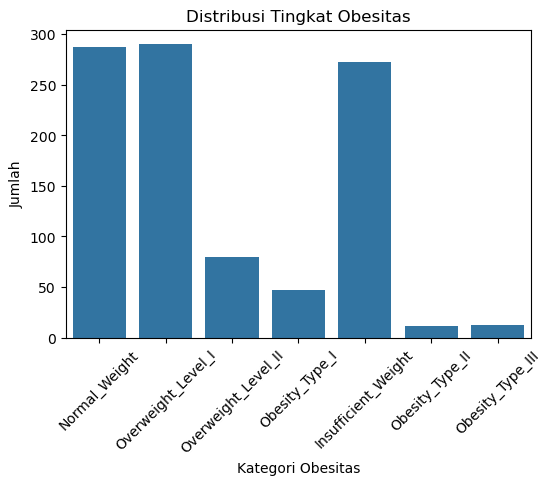

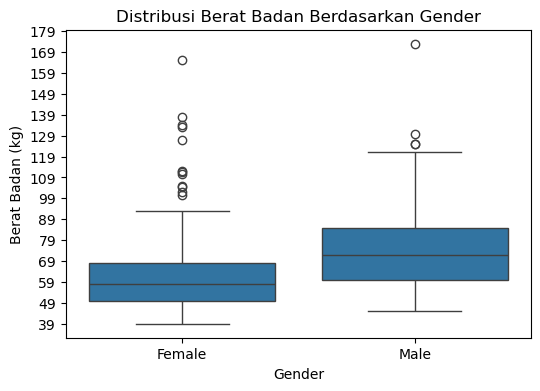

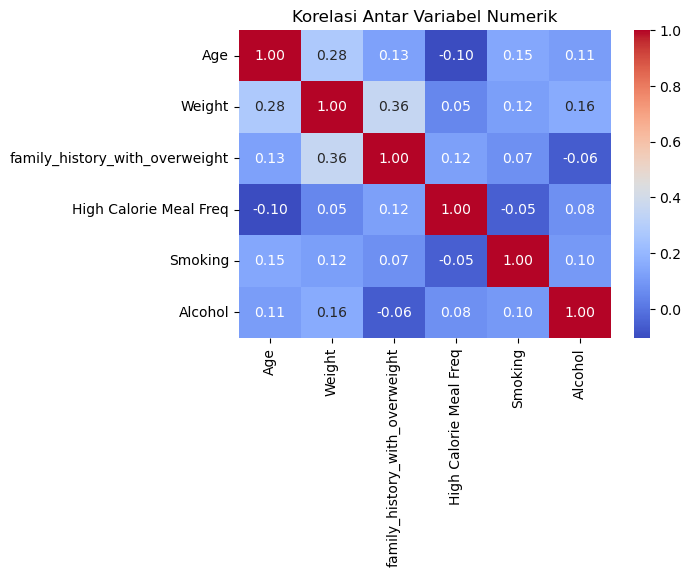

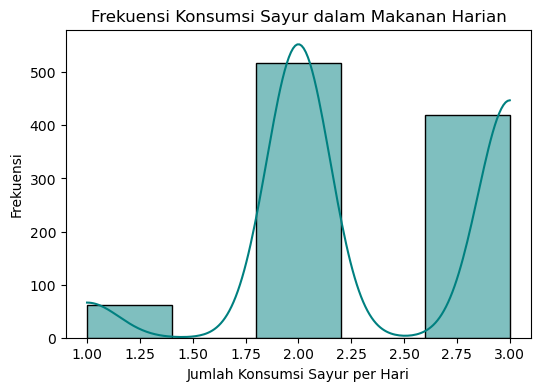

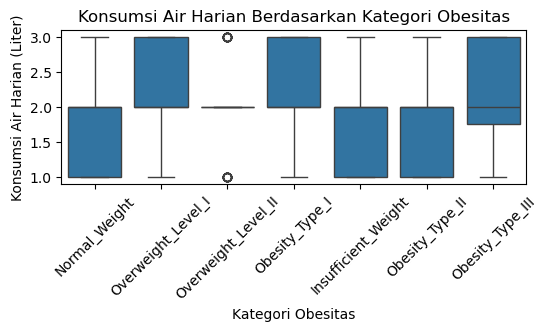

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribusi Tingkat Obesitas
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Obesity level')
plt.title('Distribusi Tingkat Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Distribusi Berat Badan Berdasarkan Gender
data['Gender'] = data['Gender'].replace({0: 'Female', 1: 'Male'})
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce')
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Gender', y='Weight')
plt.title('Distribusi Berat Badan Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Berat Badan (kg)')
plt.yticks(ticks=range(int(data['Weight'].min()), int(data['Weight'].max()) + 10, 10))  # Sesuaikan interval
plt.show()

# Plot 3: Korelasi Antar Variabel Numerik
plt.figure(figsize=(6, 4))
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# Plot 4: Frekuensi Konsumsi Sayur dalam Makanan Harian
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Veggies in Meals freq', kde=True, bins=5, color='teal')
plt.title('Frekuensi Konsumsi Sayur dalam Makanan Harian')
plt.xlabel('Jumlah Konsumsi Sayur per Hari')
plt.ylabel('Frekuensi')
plt.show()

# Plot 5: Konsumsi Air Harian Berdasarkan Kategori Obesitas
plt.figure(figsize=(6, 2))
sns.boxplot(data=data, x='Obesity level', y='Daily Water Consumption')
plt.title('Konsumsi Air Harian Berdasarkan Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Konsumsi Air Harian (Liter)')
plt.xticks(rotation=45)
plt.show()

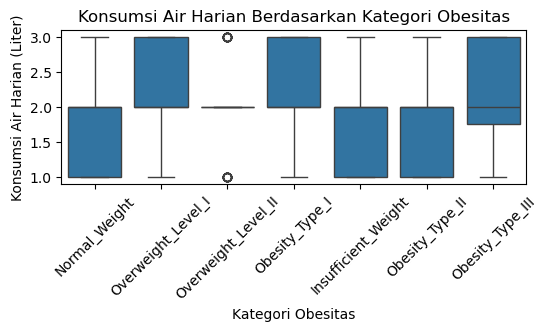

In [171]:
plt.figure(figsize=(6, 2))
sns.boxplot(data=data, x='Obesity level', y='Daily Water Consumption')
plt.title('Konsumsi Air Harian Berdasarkan Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Konsumsi Air Harian (Liter)')
plt.xticks(rotation=45)
plt.show()

penjeslasan output:
plot1:
dalam distribusi tingkat obesitas, kategori normal, insufficient, dan overweight level 1 memiliki jumlah data yang hampir sama banyak dikisaran kurang lebih antara 275 hingga 290, sedangkan overweight level2, obesity type 1-3 memiliki data yang relatif rendah yaitu sekitar kurang-lebih 75 untuk overweight level 2 dan sisanya dibawah 50.

plot2:
median berat badan male lebih tinggi dari female, ada beberapa outlier dikedua gender terutama jika berat sudah melebihi dari 100kg

plot3:
dari heatmap kita bisa lihat bahwa variable yg memiliki hubungan korelasi yang cukup signifikan adalah weight dan height

plot4:
sebagian besar orang mengonsumsi sayur sekitar 2kali sehari

plot5:
konsumsi air yang rendah cenderung terlihat pada tingkat obesitas yang yang lebih tinggi (obesitas tipe 1dan2), sedangkan normal weight dan insufficient weight memiliki variasi konsumsi air yang lebih besar dibandingkan kategori lainnya.


## Random Forest and XGboost Model

#### Encode fitur categorical

In [175]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = data.drop(columns=['Obesity level'])  # Fitur
y = data['Obesity level']  # Target

# Fitur kategorikal yang perlu encoding
categorical_features = ['Gender', 'family_history_with_overweight', 
                        'High Calorie Meal Freq', 'Smoking', 'Transportation']

# dengan teknik OneHotEncoding 
one_hot = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Transform data fitur
X_encoded = one_hot.fit_transform(X).astype(float)

#### Encode Target dengan Label Encoding

In [179]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Pisahkan data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

#### Tuning Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train, y_train)

rf_best_model = rf_grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


#### Tuning XGBoost

In [185]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric="mlogloss")
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3, scoring='accuracy', verbose=1)
xgb_grid_search.fit(X_train, y_train)

xgb_best_model = xgb_grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


#### Evaluasi dan hasil dari Random Forest dan XGBoost

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

rf_metrics = evaluate_model(rf_best_model, X_test, y_test)
xgb_metrics = evaluate_model(xgb_best_model, X_test, y_test)

# Tampilkan hasil
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [rf_metrics[0], xgb_metrics[0]],
    'Precision': [rf_metrics[1], xgb_metrics[1]],
    'Recall': [rf_metrics[2], xgb_metrics[2]],
    'F1 Score': [rf_metrics[3], xgb_metrics[3]]
})
print(results)
print("\nBest Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)

           Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest     0.840   0.836162   0.840  0.829882
1        XGBoost     0.895   0.905170   0.895  0.888169

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}


## Analisa Evaluation Matriks

#### Confusion Matrix

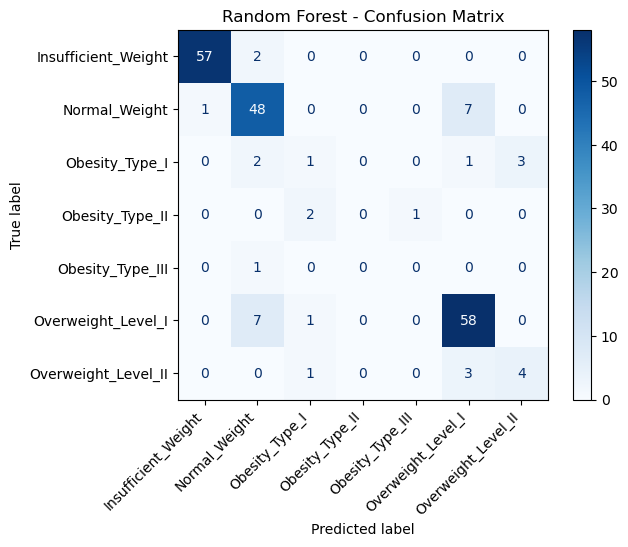

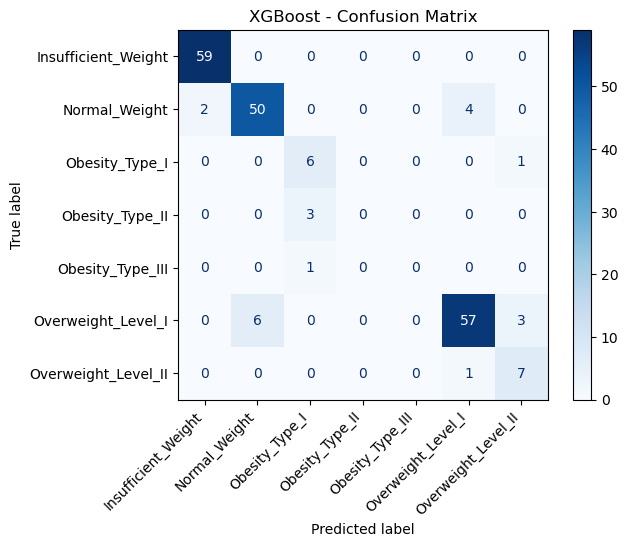

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_best_model.predict(X_test))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=le_target.classes_)
disp_rf.plot(cmap='Blues')
plt.xticks(rotation=45, ha='right')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Confusion Matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_best_model.predict(X_test))
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=le_target.classes_)
disp_xgb.plot(cmap='Blues')
plt.xticks(rotation=45, ha='right')
plt.title("XGBoost - Confusion Matrix")
plt.show()


### ROC Curve and AUC

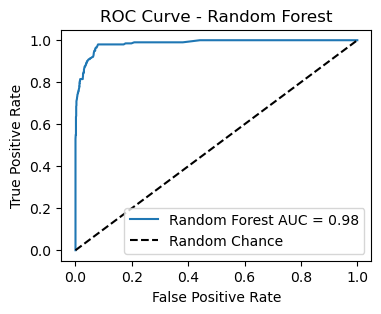

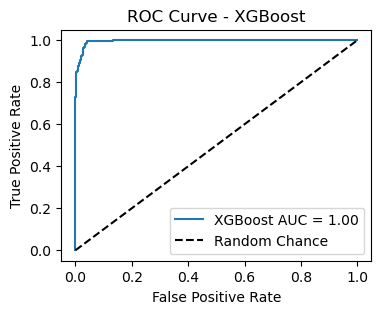

In [192]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=range(len(le_target.classes_)))

# Random Forest - ROC Curve
rf_probs = rf_best_model.predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized.ravel(), rf_probs.ravel())
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(4, 3))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# XGBoost - ROC Curve
xgb_probs = xgb_best_model.predict_proba(X_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_binarized.ravel(), xgb_probs.ravel())
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(4, 3))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost AUC = {roc_auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


### MSE, RMSE, MAE, an R-squared

In [194]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Random Forest - Metrik Regresi
rf_mse = mean_squared_error(y_test, rf_best_model.predict(X_test))
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_best_model.predict(X_test))
rf_r2 = r2_score(y_test, rf_best_model.predict(X_test))

# XGBoost - Metrik Regresi
xgb_mse = mean_squared_error(y_test, xgb_best_model.predict(X_test))
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_best_model.predict(X_test))
xgb_r2 = r2_score(y_test, xgb_best_model.predict(X_test))

# Tampilkan hasil
print("Random Forest:")
print(f"MSE: {rf_mse:.4f}, RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}, R-squared: {rf_r2:.4f}")
print("\nXGBoost:")
print(f"MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}, R-squared: {xgb_r2:.4f}")


Random Forest:
MSE: 1.6300, RMSE: 1.2767, MAE: 0.4600, R-squared: 0.6748

XGBoost:
MSE: 0.9450, RMSE: 0.9721, MAE: 0.2750, R-squared: 0.8115


## conclussion dari evaluasi metriks
#### Confusion Matrix
Detail Per Kategori(Confusion Matrix-----XGboost):

-Insufficient Weight:

    >Benar (True Positive): 57 sampel diprediksi dengan benar ----- 59 sampel diprediksi dengan benar
    >Salah (False Negative): 2 sampel diprediksi sebagai Normal Weight ----- Tidak ada prediksi yang salah untuk kategori ini

    
-Normal Weight:
    
    Benar: >48 sampel diprediksi dengan benar ----- Sebanyak 50 sampel diprediksi dengan benar.
    Salah:
        >1 sampel diprediksi sebagai Insufficient Weight ----- 2 sampel diprediksi sebagai Insufficient Weight.
        >7 sampel diprediksi sebagai Overweight Level I ----- 4 sampel diprediksi sebagai Overweight Level I.
-Obesity Type I:

    Benar: >1 sampel diprediksi dengan benar ----- Sebanyak 6 sampel diprediksi dengan benar.

    Salah:
        >2 sampel diprediksi sebagai Normal Weight ----- 1 sampel diprediksi sebagai Overweight Level II
        >3 sampel diprediksi sebagai Overweight Level I ----- tidak ada prediksi yang salah         
-Obesity Type II:

    Benar: >2 sampel diprediksi dengan benar ----- Sebanyak 3 sampel diprediksi dengan benar.
    Salah: >1 sampel diprediksi sebagai Obesity Type III ----- tidak ada prediksi yang salah   
-Obesity Type III:
    Benar: >tidak ada ----  Sebanyak 1 sampel diprediksi dengan benar.
    Salah: >Semua sampel salah diprediksi ----- Tidak ada prediksi yang salah untuk kategori ini
-Overweight Level I:

    Benar: >58 sampel diprediksi dengan benar ----- Sebanyak 57 sampel diprediksi dengan benar.
    Salah:
        >7 sampel diprediksi sebagai Normal Weight ----- 6 sampel diprediksi sebagai Normal Weight.
        >1 sampel diprediksi sebagai Obesity Type I ----- 3 sampel diprediksi sebagai Overweight Level II   
-Overweight Level II:

    Benar: >4 sampel diprediksi dengan benar ----- Sebanyak 7 sampel diprediksi dengan benar.
    Salah:
        >3 sampel diprediksi sebagai Overweight Level I ----- 1 sampel diprediksi sebagai Obesity Type I.
        >1 sampel diprediksi sebagai Obesity Type I.        
-Kesimpulan:

-Performa Keseluruhan:

    XGBoost lebih unggul dibandingkan Random Forest, dengan akurasi 89,5% vs 84,0% dan F1 Score 88,8% vs 82,9%.
    XGBoost lebih konsisten dalam memprediksi semua kategori, termasuk kelas minoritas seperti Obesity Type III.

-Kemampuan Prediksi:

    Random Forest:
        Sangat baik pada kategori mayoritas seperti Insufficient Weight dan Overweight Level I, tetapi kesulitan pada kelas minoritas seperti Obesity Type III.
    XGBoost:
        Lebih stabil dan akurat pada semua kategori, termasuk kelas minoritas, dengan kesalahan prediksi lebih sedikit.
-Rekomendasi:

XGBoost adalah model yang direkomendasikan karena performanya lebih baik secara keseluruhan, terutama untuk data dengan distribusi tidak seimbang.
Random Forest dapat ditingkatkan melalui fine-tuning lebih lanjut.

#### ROC Curve

penjelasan : 

1. Random Forest

    AUC (Area Under Curve):
   
   >Nilai AUC = 0.98 menunjukkan bahwa model Random Forest memiliki performa yang sangat baik dalam membedakan antara kelas.
        >AUC mendekati 1 berarti model memiliki kemampuan diskriminasi yang sangat tinggi.

 Bentuk Kurva:
   
>Kurva berada sangat dekat dengan sudut kiri atas, menunjukkan tingkat True Positive Rate (TPR) yang tinggi sekaligus False Positive Rate (FPR) yang rendah.
        >Ini mengindikasikan model Random Forest memiliki keseimbangan yang baik antara sensitivitas (recall) dan spesifisitas.

2. XGBoost
   
    AUC (Area Under Curve):
   
        Nilai AUC = 1.00 menunjukkan bahwa model XGBoost memiliki performa sempurna dalam membedakan kelas positif dan negatif.
        AUC = 1 berarti tidak ada kesalahan dalam prediksi probabilitas untuk setiap kelas.
   
Bentuk Kurva:

>Kurva hampir sempurna berada di sudut kiri atas dengan nilai TPR = 1 dan FPR = 0 di sebagian besar titik.
 >Ini menunjukkan bahwa XGBoost tidak membuat kesalahan prediksi dan mampu menangkap semua kasus positif tanpa menghasilkan False Positives.

Kesimpulan:

    AUC:

>XGBoost lebih unggul dibanding Random Forest karena memiliki AUC = 1.00 dibandingkan 0.98.
    >Ini menunjukkan bahwa XGBoost mampu menangani data dengan tingkat akurasi dan kemampuan diskriminasi yang lebih tinggi.
    
    Kemampuan Diskriminasi:

>XGBoost menunjukkan kemampuan diskriminasi sempurna tanpa kesalahan prediksi.
    >Random Forest juga memiliki performa sangat baik, tetapi sedikit lebih rendah dibandingkan XGBoost.
     
    Rekomendasi:

>Jika memprioritaskan performa terbaik untuk membedakan kelas, XGBoost adalah model yang lebih baik.
     >Namun, Random Forest tetap merupakan pilihan yang baik jika kompleksitas dan interpretasi lebih menjadi prioritas.

#### MSE, RMSE, MAE, an R-squared

1. Random Forest
    MSE (Mean Squared Error): 1.6300

    >Mengukur rata-rata kuadrat kesalahan antara prediksi dan nilai sebenarnya.
    >Nilai yang lebih rendah menunjukkan prediksi yang lebih akurat. Nilai 1.63 menunjukkan bahwa ada beberapa deviasi yang cukup besar dari prediksi        terhadap nilai sebenarnya.
   
    RMSE (Root Mean Squared Error): 1.2767

    >Akar dari MSE, memberikan kesalahan rata-rata dalam skala yang sama dengan data asli.
    >Nilai ini menunjukkan bahwa rata-rata deviasi model dari nilai sebenarnya adalah sekitar 1.27 unit.
    
    MAE (Mean Absolute Error): 0.4600

     >Mengukur rata-rata perbedaan absolut antara prediksi dan nilai sebenarnya.
     >Nilai ini lebih rendah dari RMSE, menunjukkan bahwa sebagian besar kesalahan cukup kecil (di bawah 0.46 unit), tetapi ada beberapa outlier yang         menyebabkan RMSE lebih besar.

    R-squared (R²): 0.6748

     >Mengukur seberapa baik model menjelaskan variabilitas data.
     >Nilai 0.6748 berarti model Random Forest menjelaskan sekitar 67,48% dari variabilitas data target. Ini menunjukkan performa yang cukup baik,            tetapi masih ada ruang untuk peningkatan.

2. XGBoost

    MSE: 0.9450

    >Lebih rendah dibandingkan Random Forest, menunjukkan prediksi yang lebih akurat.
    >Model XGBoost memiliki kesalahan rata-rata kuadrat yang lebih kecil, menunjukkan kemampuan prediksi yang lebih baik.

    RMSE: 0.9721

    >Juga lebih rendah dibandingkan Random Forest, menunjukkan rata-rata deviasi prediksi terhadap nilai sebenarnya lebih kecil, sekitar 0.97 unit.

   MAE: 0.2750

    >Lebih rendah dibandingkan Random Forest, menunjukkan bahwa rata-rata kesalahan absolut lebih kecil, sekitar 0.28 unit.
    >Nilai ini menunjukkan bahwa sebagian besar prediksi XGBoost mendekati nilai sebenarnya.

    R-squared (R²): 0.8115

    >Nilai yang lebih tinggi dibandingkan Random Forest, menunjukkan bahwa model XGBoost menjelaskan 81,15% dari variabilitas data target.
    >Ini berarti XGBoost lebih baik dalam menangkap pola dan hubungan antara fitur dan target.

Kesimpulan:

    Kesalahan (MSE, RMSE, MAE):

   >XGBoost menunjukkan kesalahan prediksi yang lebih kecil dibandingkan Random Forest, baik dalam kuadrat kesalahan (MSE), akar kuadrat kesalahan          (RMSE), maupun kesalahan absolut rata-rata (MAE).
   >Ini menunjukkan bahwa XGBoost menghasilkan prediksi yang lebih mendekati nilai sebenarnya.

    Kemampuan Penjelasan Data (R-squared):

   >XGBoost memiliki R² = 0.8115, yang lebih tinggi dibandingkan Random Forest (R² = 0.6748).
   >Ini berarti XGBoost lebih baik dalam menjelaskan variabilitas data target dibandingkan Random Forest.

    Rekomendasi:

   >XGBoost lebih unggul dalam hal prediksi yang akurat dan generalisasi pada data ini.
   >Random Forest masih cukup baik, tetapi performanya lebih rendah dibandingkan XGBoost, terutama dalam menjelaskan variabilitas data target.


### Fitur penting untuk prediksi output

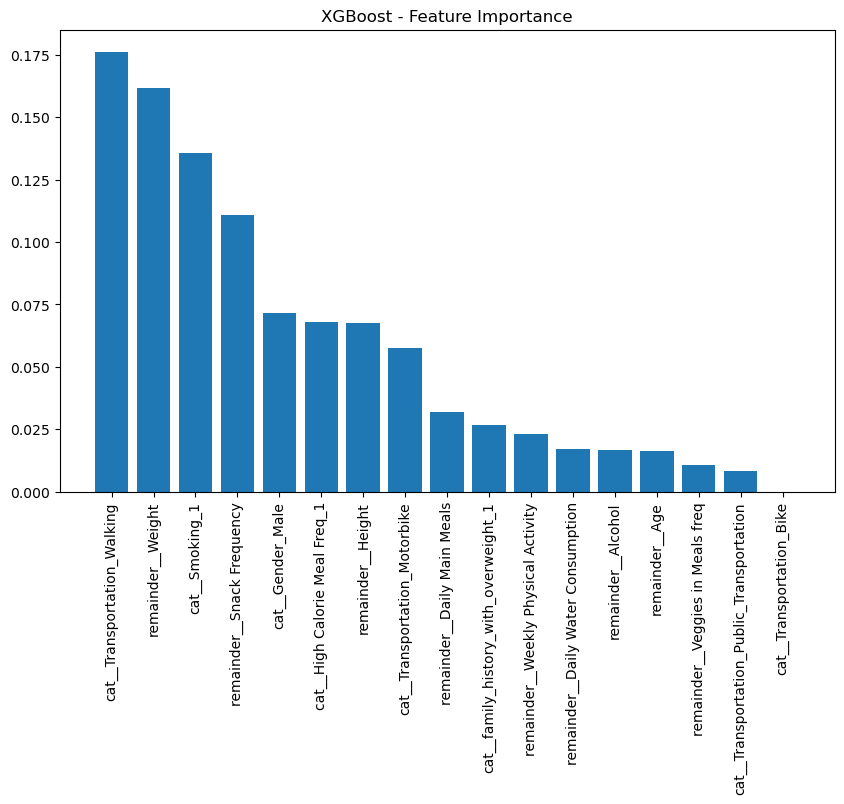

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Fitur Penting XGBoost
xgb_feature_importances = xgb_best_model.feature_importances_
xgb_sorted_idx = np.argsort(xgb_feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_features)), xgb_feature_importances[xgb_sorted_idx])
plt.xticks(range(len(rf_features)), rf_features[xgb_sorted_idx], rotation=90)
plt.title("XGBoost - Feature Importance")
plt.show()
